# 1 Import Data

In [1]:
import pandas as pd
import os

In [2]:
# Set the path to the main project folder
path = r'C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization\Data Sets'

In [3]:
# Import the orders data
df = pd.read_csv(os.path.join(path, '80s_Weather_scaled.csv'))

In [4]:
df.head()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19800101,1,-1.444209,-1.428479,-1.269419,-1.356022,-1.432024,-1.108021,-2.171863,-1.373112,-1.390799,-1.450023,-0.311157,-1.319862,-1.116626,-1.552995,-2.070328,-0.898228,-1.249587,-1.641922
1,19800102,1,-1.566772,-1.554529,-1.281054,-1.558895,-1.446441,-1.082513,-2.171863,-1.306064,-1.486870,-1.464922,-0.872664,-1.444156,-1.411235,-1.671414,-2.432437,-1.282795,-1.527087,-1.110077
2,19800103,1,-1.416973,-1.646201,-1.571908,-1.855402,-1.532946,-1.159035,-1.408716,-1.802219,-1.558924,-1.479821,-1.269828,-1.556020,-2.035805,-1.952658,-2.635218,-1.487096,-1.650420,-0.365493
3,19800104,1,-1.457827,-2.035811,-1.874396,-1.246783,-1.244597,-1.363093,-0.957766,-1.359702,-1.931200,-1.122243,-1.269828,-1.630596,-2.471826,-2.322715,-1.939969,-1.547184,-0.941254,-0.764377
4,19800105,1,-0.926723,-1.829547,-2.130347,-0.887854,-0.812074,-1.605411,-1.027143,-0.984234,-1.174638,-0.839161,-1.256133,-0.698395,-1.529078,-1.760227,-0.737767,-0.946299,-0.725422,-0.790969


# 2 Create Dendrograms with Different Linkage Methods

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create linkage matrices for each method
linkage_single = linkage(df, method='single')
linkage_complete = linkage(df, method='complete')
linkage_average = linkage(df, method='average')
linkage_ward = linkage(df, method='ward')

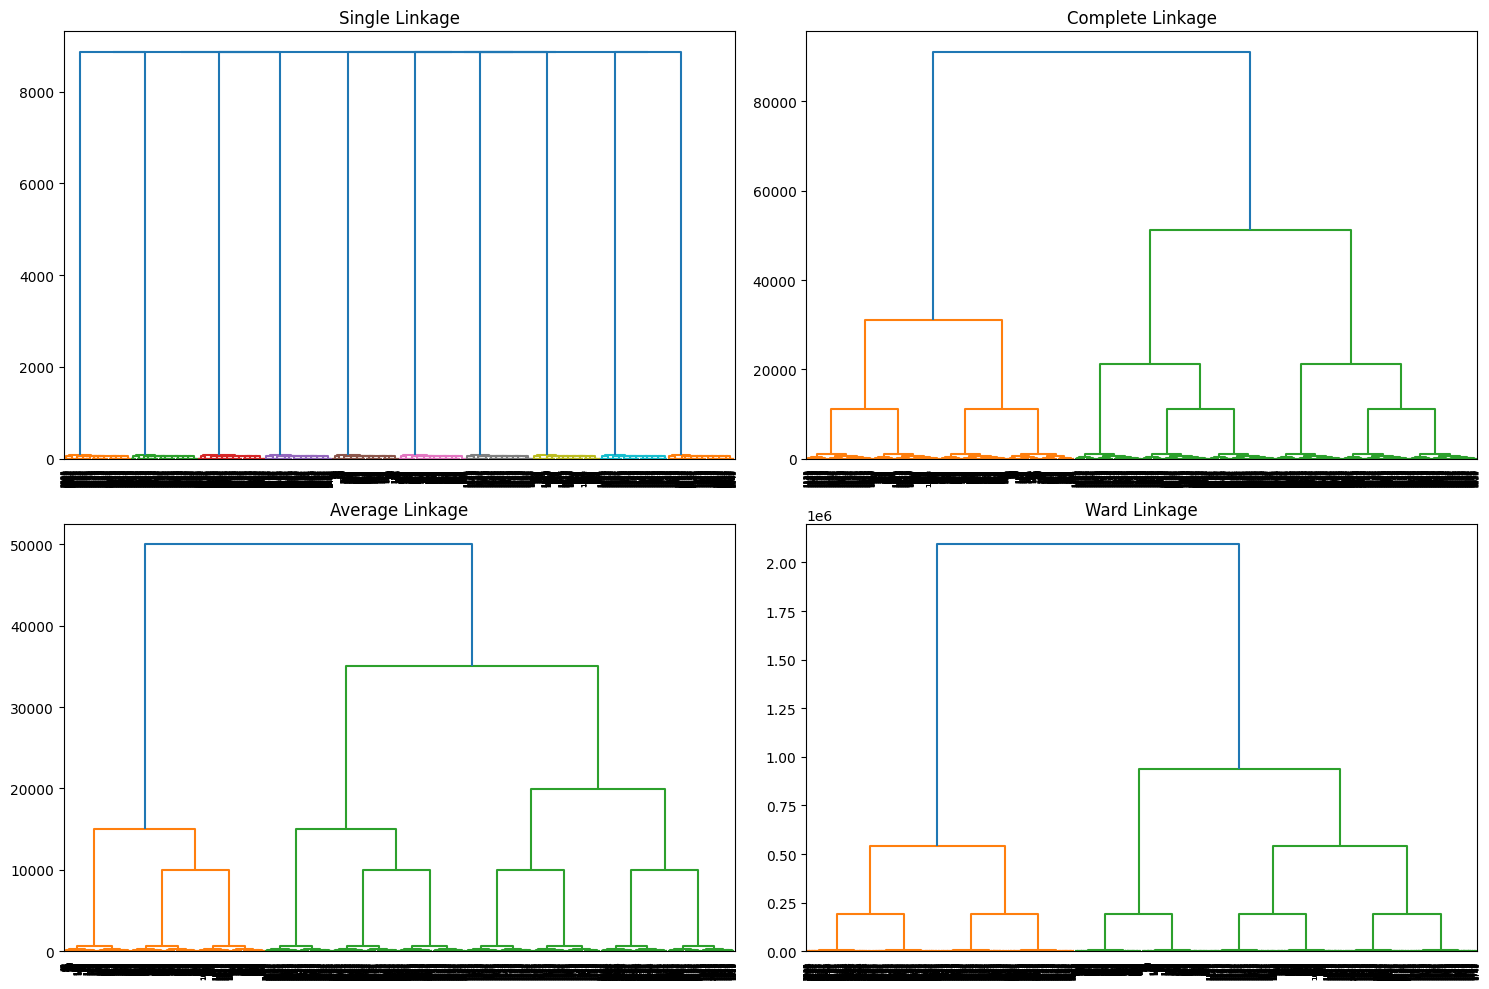

In [6]:
# Plot dendrograms for each method
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Single linkage
dendrogram(linkage_single, ax=axs[0, 0])
axs[0, 0].set_title('Single Linkage')

# Complete linkage
dendrogram(linkage_complete, ax=axs[0, 1])
axs[0, 1].set_title('Complete Linkage')

# Average linkage
dendrogram(linkage_average, ax=axs[1, 0])
axs[1, 0].set_title('Average Linkage')

# Ward's method
dendrogram(linkage_ward, ax=axs[1, 1])
axs[1, 1].set_title('Ward Linkage')

plt.tight_layout()
plt.show()

### Dendrogram Analysis

The dendrograms visualize the clustering results using different linkage methods. Here's a brief analysis of each:

1. **Single Linkage**:
   - This method connects the closest pair of points between two clusters.
   - The result shows many small clusters connected very quickly, meaning clusters are formed with minimal distance.
   - This often results in "chaining" and may not produce well-separated clusters.

2. **Complete Linkage**:
   - This method considers the maximum distance between points in different clusters.
   - The dendrogram reveals more distinct clusters compared to single linkage, with better separation.
   - This method tends to form compact clusters and may be more suitable for this data.

3. **Average Linkage**:
   - This method takes the average distance between all pairs of points in two clusters.
   - The resulting dendrogram strikes a balance between single and complete linkage, providing more moderate cluster separations.
   - This is often a good compromise for forming balanced clusters.

4. **Ward’s Linkage**:
   - Ward's method minimizes the variance within clusters.
   - The clusters are very distinct and larger in this dendrogram, meaning that fewer clusters are formed at higher distances.
   - This method may be best suited for your data if you want a few large, well-separated clusters.

### Conclusion
Based on the dendrograms, **Ward's Linkage** seems to provide the clearest, well-separated clusters, while **Single Linkage** may lead to "chaining" and less meaningful groupings. 

# 3 Record the Number of Clusters

In [7]:
from scipy.cluster.hierarchy import fcluster

# Set the threshold distance to cut the dendrogram
threshold_distance = 10  # Adjust as necessary

# Get clusters for each linkage method
clusters_single = fcluster(linkage_single, threshold_distance, criterion='distance')
clusters_complete = fcluster(linkage_complete, threshold_distance, criterion='distance')
clusters_average = fcluster(linkage_average, threshold_distance, criterion='distance')
clusters_ward = fcluster(linkage_ward, threshold_distance, criterion='distance')

# Print number of clusters for each method
print(f"Number of clusters (Single Linkage): {len(set(clusters_single))}")
print(f"Number of clusters (Complete Linkage): {len(set(clusters_complete))}")
print(f"Number of clusters (Average Linkage): {len(set(clusters_average))}")
print(f"Number of clusters (Ward Linkage): {len(set(clusters_ward))}")

Number of clusters (Single Linkage): 120
Number of clusters (Complete Linkage): 520
Number of clusters (Average Linkage): 279
Number of clusters (Ward Linkage): 600


## Cluster Analysis Insights

### Cluster Formation Varies Greatly by Linkage Method:
- **Single Linkage (120 clusters)**: Produces the fewest number of clusters. This method is sensitive to outliers and tends to form elongated clusters (chaining). The result suggests that single linkage may not provide clearly separated clusters, which could reduce the clarity of individual weather patterns.
  
- **Complete Linkage (520 clusters)**: Generates a large number of clusters, implying a more conservative approach to forming clusters. Complete linkage maximizes the distance between points when merging, providing well-separated clusters. This could help ClimateWins find distinct weather patterns.

- **Average Linkage (279 clusters)**: Forms a moderate number of clusters, balancing the chaining effect of single linkage and the strict separation of complete linkage. This might be a good compromise, offering a balanced view of weather station connections.

- **Ward Linkage (600 clusters)**: Produces the most clusters, suggesting a focus on minimizing variance within each cluster. This method might detect subtle patterns but results in many small clusters, potentially making it difficult to generalize larger weather trends.

### Implications for ClimateWins:
- **Single Linkage** might capture broader connections between weather stations but could lead to less coherent clusters.
  
- **Complete Linkage** offers more clearly separated clusters, ideal for identifying distinct weather trends, though the high number of clusters might make larger patterns harder to spot.

- **Average Linkage** provides a moderate approach, balancing clarity with broad connections, making it useful for general weather pattern analysis.

- **Ward Linkage** creates many small clusters, useful for highly localized predictions, but it might overwhelm computational resources due to the number of clusters.

### Next Steps:
- For **broader regional analysis**, **average** or **complete linkage** could provide a good balance between connection and clarity.
- For **localized predictions**, **Ward linkage** might help detect small-scale differences, though ClimateWins should consider the computational cost.
- **Single Linkage** might be less ideal, as its tendency to form elongated clusters could make meaningful conclusions harder to draw.

These insights can help ClimateWins choose the best clustering method based on their specific goals and weather analysis needs.
